<a href="https://colab.research.google.com/github/nirajlondhe8/aiml/blob/main/PCAnWithoutPCA_RAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Define number of rows
num_rows = 56

# Generate synthetic data
data = {
    'RSRP': np.random.uniform(-100, -50, num_rows),  # Signal Strength (dBm)
    'RSRQ': np.random.uniform(-20, -10, num_rows),   # Signal Quality (dB)
    'Carrier_Aggregation': np.random.randint(1, 4, num_rows),  # Number of Carriers
    'Channel_Bandwidth': np.random.choice([5, 10, 15, 20], num_rows),  # Channel Bandwidth (MHz)
    'Modulation_Scheme': np.random.choice([2, 4, 6, 8], num_rows),  # Modulation Scheme (QAM)
    'MIMO_Configuration': np.random.choice([2, 4, 8], num_rows),  # MIMO Configuration
    'PRB_Usage': np.random.uniform(0, 100, num_rows),  # PRB Usage (%)
    'Interference_Levels': np.random.uniform(0, 30, num_rows),  # Interference Levels (dB)
    'Cell_Load': np.random.uniform(0, 100, num_rows),  # Cell Load (%)
    'Handover_Success_Rate': np.random.uniform(80, 100, num_rows),  # Handover Success Rate (%)
    'Connection_Setup_Time': np.random.uniform(50, 200, num_rows)  # Connection Setup Time (ms)
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('5g_network_data.csv', index=False)

print("Sample dataset created and saved to '5g_network_data.csv'.")


Sample dataset created and saved to '5g_network_data.csv'.


**Data Preparation**

Use dataset with features influencing connection setup time, let's start with the data preparation and splitting:


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset
data = pd.read_csv('5g_network_data.csv')

# Features and target
X = data[['RSRP', 'RSRQ', 'Carrier_Aggregation', 'Channel_Bandwidth', 'Modulation_Scheme', 'MIMO_Configuration', 'PRB_Usage', 'Interference_Levels', 'Cell_Load', 'Handover_Success_Rate']]
y = data['Connection_Setup_Time']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Apply PCA

In [4]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Apply PCA
pca = PCA(n_components=2)  # Choosing 2 components for demonstration
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train a Random Forest Regressor on PCA-transformed data
regressor_pca = RandomForestRegressor(n_estimators=100, random_state=42)
regressor_pca.fit(X_train_pca, y_train)

# Predict and evaluate
y_pred_pca = regressor_pca.predict(X_test_pca)
print("Regression Report with PCA:")
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_pca)}')
print(f'R^2 Score: {r2_score(y_test, y_pred_pca)}')


Regression Report with PCA:
Mean Squared Error: 3095.6083584549647
R^2 Score: -0.39800842238563594


In [5]:
# Train a Random Forest Regressor on scaled data without PCA
regressor_no_pca = RandomForestRegressor(n_estimators=100, random_state=42)
regressor_no_pca.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_no_pca = regressor_no_pca.predict(X_test_scaled)
print("Regression Report without PCA:")
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_no_pca)}')
print(f'R^2 Score: {r2_score(y_test, y_pred_no_pca)}')


Regression Report without PCA:
Mean Squared Error: 2567.6570199465377
R^2 Score: -0.15958019362451115


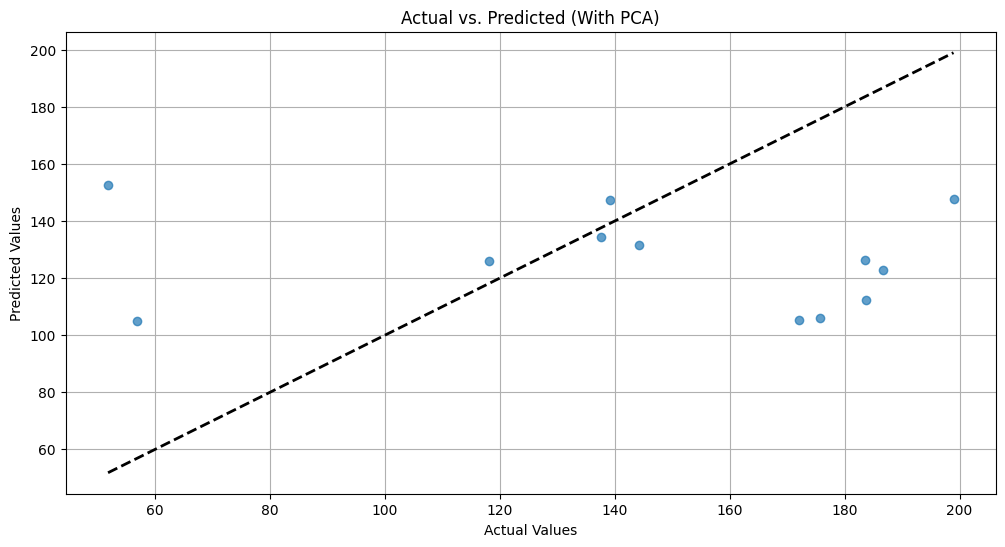

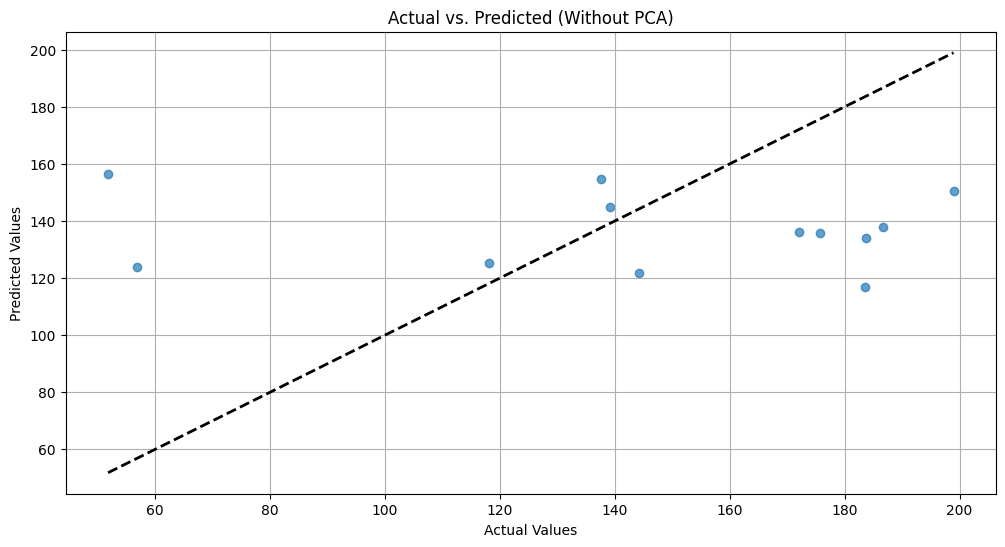

In [7]:
import matplotlib.pyplot as plt
# Plotting function
def plot_comparison(y_true, y_pred, title):
    plt.figure(figsize=(12, 6))
    plt.scatter(y_true, y_pred, alpha=0.7)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'k--', lw=2)  # Line of equality
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Plot with PCA
plot_comparison(y_test, y_pred_pca, 'Actual vs. Predicted (With PCA)')

# Plot without PCA
plot_comparison(y_test, y_pred_no_pca, 'Actual vs. Predicted (Without PCA)')
